<a href="https://colab.research.google.com/github/JENEEFATHOMAS/White-Blood-Cell-Classification/blob/main/blood_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting google drive**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

**Import kaggle dataset**

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
!ls

kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/blood-cells

 89% 96.0M/108M [00:01<00:00, 81.8MB/s]
100% 108M/108M [00:01<00:00, 79.2MB/s] 


In [ ]:
!mkdir blood-cells
!mv blood-cells.zip blood-cells

mkdir: cannot create directory ‘blood-cells’: File exists


In [ ]:
%cd blood-cells/

/content/gdrive/My Drive/kaggle_dataset/blood-cells


**Unzip dataset**

In [ ]:
!unzip blood-cells.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8050.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: dataset2-mast

**IMPORTING LIBRARIES**


In [4]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [5]:
train_dir = '/content/gdrive/MyDrive/kaggle_dataset/blood-cells/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/gdrive/MyDrive/kaggle_dataset/blood-cells/dataset2-master/dataset2-master/images/TEST'


In [6]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [8]:
train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    subset='training'
)
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


**Image processing**

In [9]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [10]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

**Fitting CNN model:**

In [11]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
249/249 [==============================] - 2460s 10s/step - loss: 0.8110 - accuracy: 0.6658 - val_loss: 0.5337 - val_accuracy: 0.7999
Epoch 2/100
249/249 [==============================] - 320s 1s/step - loss: 0.4665 - accuracy: 0.8239 - val_loss: 0.3959 - val_accuracy: 0.8497
Epoch 3/100
249/249 [==============================] - 339s 1s/step - loss: 0.3480 - accuracy: 0.8672 - val_loss: 0.3688 - val_accuracy: 0.8552
Epoch 4/100
249/249 [==============================] - 322s 1s/step - loss: 0.2790 - accuracy: 0.8992 - val_loss: 0.3135 - val_accuracy: 0.8693
Epoch 5/100
249/249 [==============================] - 307s 1s/step - loss: 0.2233 - accuracy: 0.9180 - val_loss: 0.2972 - val_accuracy: 0.8854
Epoch 6/100
249/249 [==============================] - 305s 1s/step - loss: 0.1814 - accuracy: 0.9351 - val_loss: 0.2333 - val_accuracy: 0.9100
Epoch 7/100
249/249 [==============================] - 313s 1s/step - loss: 0.1425 - accuracy: 0.9534 - val_loss: 0.2125 - val_accurac

**Class Types:**

In [12]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Plotting:**

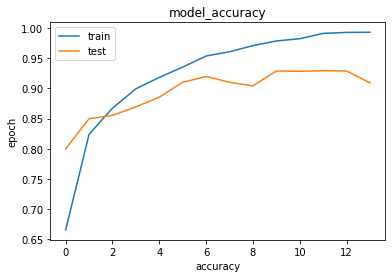

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','test'],loc='upper left')
plt.show()

**Test Confusion Matrix:**

Test Accuracy: 53.036%


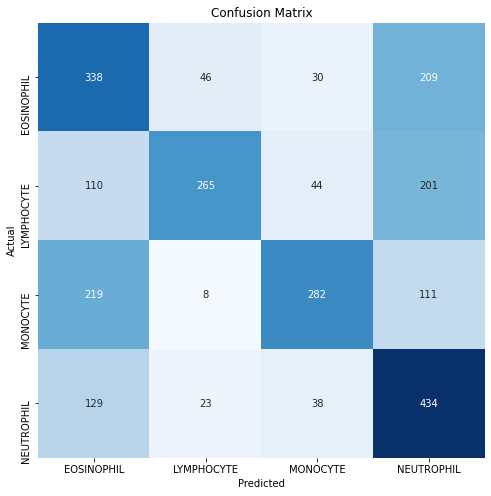

 Test Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.42      0.54      0.48       623
  LYMPHOCYTE       0.77      0.43      0.55       620
    MONOCYTE       0.72      0.45      0.56       620
  NEUTROPHIL       0.45      0.70      0.55       624

    accuracy                           0.53      2487
   macro avg       0.59      0.53      0.53      2487
weighted avg       0.59      0.53      0.53      2487



In [16]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(" Test Classification Report:\n----------------------\n", clr)

**Train Confusion Matrix:**


Found 1989 images belonging to 4 classes.
Validation Accuracy: 93.263%


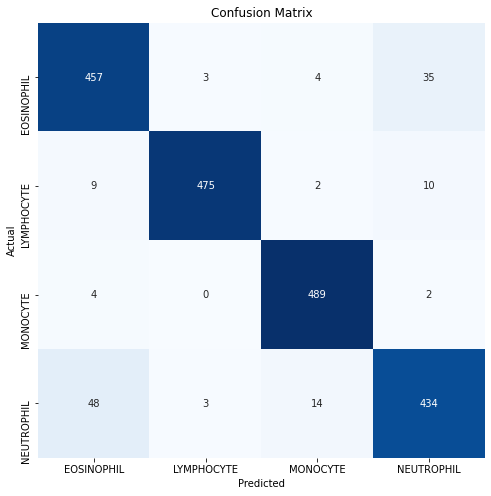

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.88      0.92      0.90       499
  LYMPHOCYTE       0.99      0.96      0.97       496
    MONOCYTE       0.96      0.99      0.97       495
  NEUTROPHIL       0.90      0.87      0.89       499

    accuracy                           0.93      1989
   macro avg       0.93      0.93      0.93      1989
weighted avg       0.93      0.93      0.93      1989



In [ ]:
val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)


predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)